In [13]:
import os
import numpy as np

from read_data import ReadClass

experiment_name = "exRo10N3e06_LES"
figure_directory = "../figure/" + experiment_name
if not os.path.isdir(figure_directory):
    os.makedirs(figure_directory)
reader = ReadClass(experiment_name)
reader.read_geometry(0)
reader.read_budget(0)
time_period = reader.time / reader.vortex_period
time_days = reader.time / 86400
total_energy = reader.KE + reader.PE

output_per_day = 86400 / reader.output_interval

NT = np.size(time_period)

for j in range(np.size(reader.KE)):
    print(j, time_days[j], reader.KE[j])

0 0.0 1.35e-07
1 0.010544697796856916 1.3164505e-07
2 0.021089395593713832 1.2291738e-07
3 0.03163409197771991 1.11298206e-07
4 0.042178791187427664 1.0011093e-07
5 0.05272349039713542 9.255313e-08
6 0.06326818395543982 9.076523e-08
7 0.07381288316514757 9.5207334e-08
8 0.08435758237485533 1.04525796e-07
9 0.09490227593315972 1.1594837e-07
10 0.10544698079427084 1.2609276e-07
11 0.11599167435257524 1.31953e-07
12 0.12653636791087963 1.3177605e-07
13 0.13708107277199075 1.2557331e-07
14 0.14762576633029514 1.1511798e-07
15 0.15817045988859954 1.03429e-07
16 0.16871516474971066 9.389208e-08
17 0.17925985830801505 8.9273954e-08
18 0.18980455186631945 9.091715e-08
19 0.20034925672743056 9.834991e-08
20 0.21089396158854168 1.09424825e-07
21 0.22143864384403936 1.2094567e-07
22 0.23198334870515047 1.2959964e-07
23 0.2425280535662616 1.3292306e-07
24 0.25307273582175926 1.3001912e-07
25 0.26361744068287035 1.2181805e-07
26 0.2741621455439815 1.1080424e-07
27 0.28470682779947915 1.0028944e-07


In [14]:
DKE = reader.DKE / reader.output_interval
DPE = reader.DPE / reader.output_interval
Gamma = DPE / DKE
Gamma_cum = reader.DPE / reader.DKE

total_dissipation = DKE + DPE

PKE = reader.PKE / reader.output_interval
PPE = reader.PPE / reader.output_interval
total_production = PKE + PPE

# Running mean
num = round(reader.vortex_period / reader.output_interval)
print(num)
b = np.ones(num)/num
total_production_mean = np.convolve(total_production, b, mode='same')
KE_mean = np.convolve(reader.KE, b, mode='same')
PE_mean = np.convolve(reader.PE, b, mode='same')
PWE_mean = np.convolve(reader.PWE, b, mode='same')
VE_mean = np.convolve(reader.VE, b, mode='same')
DKE_mean = np.convolve(DKE, b, mode='same')
DPE_mean = np.convolve(DPE, b, mode='same')
total_energy_mean = np.convolve(total_energy, b, mode='same')

production_time_scale = total_energy_mean / total_production_mean
dissipation_time_scale = total_energy_mean / DKE_mean

Ozmidov_scale = np.sqrt(total_dissipation / reader.buoyancy_frequency**3)

KE_max = np.max(KE_mean)
PE_max = np.max(PE_mean)
DKE_max = np.max(DKE_mean)
DPE_max = np.max(DPE_mean)
print(KE_max, PE_max, DKE_max, DPE_max)

start_day = 11
interval_day = 2

nt = int(start_day * output_per_day)
interval = int(interval_day * output_per_day)
epsilon = np.mean(DKE[nt:nt+interval])
Ozmidov_wavenumber = (reader.buoyancy_frequency**3 / epsilon)**0.5
print(epsilon, Ozmidov_wavenumber)

200
2.80891348120349e-05 2.6524437610078165e-05 1.1935077813855428e-10 7.365485675471691e-11
nan nan


/work/gs53/c24070/.conda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/work/gs53/c24070/.conda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/work/gs53/c24070/.conda/envs/py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/work/gs53/c24070/.conda/envs/py37/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


In [15]:
KE_H_mean, PE_H_mean = reader.horizontam_mean_energy_series(0, NT)
KE_H_mean_mean = np.convolve(KE_H_mean, b, mode='same')
PE_H_mean_mean = np.convolve(PE_H_mean, b, mode='same')

0 / 773 1.4999999464748726e-08 1.35e-07 0.0 1.2207274e-37
200 / 773 1.2032657537019986e-08 1.5125825e-07 2.8795803519443552e-09 1.781981e-07
400 / 773 1.335113264389065e-08 9.2855805e-07 4.357048943859354e-09 1.4909024e-06
600 / 773 1.906836111231769e-08 7.613271e-06 4.872433692071354e-07 1.4682567e-05


In [16]:
num = round(reader.vortex_period / reader.output_interval) 
print(num)
b = np.ones(num)/num

PW1 = reader.PW1 / reader.output_interval
PW2 = reader.PW2 / reader.output_interval
PVE = reader.PVE / reader.output_interval

PW1_mean = np.convolve(PW1, b, mode='same')
PW2_mean = np.convolve(PW2, b, mode='same')
PVE_mean = np.convolve(PVE, b, mode='same')

200


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


2.446369900173611

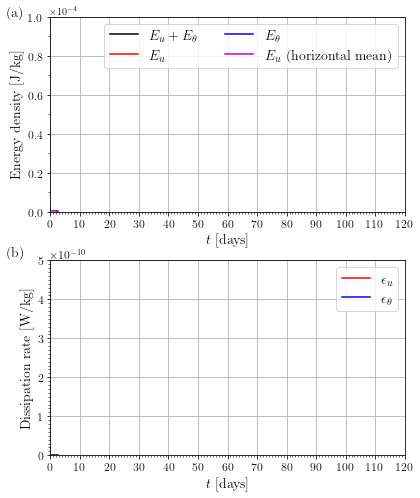

In [11]:
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.ticker as ptick

growth_rate = 0.0613 * 1.e-4
theoretical_series = np.exp(growth_rate * reader.time * 2) * 3.e-8

rc('text', usetex=True)
rc('font', family='serif')
fs = 14
plt.rcParams["font.size"] = 12

fig = plt.figure(figsize=(6, 7))
fig.subplots_adjust(left=0.15, bottom=0.08, right=0.97,
                    top=0.95, wspace=0.2, hspace=0.25)

ax1 = fig.add_subplot(211)
ax1.plot(time_days, total_energy_mean, 'k', label=r'$E_u + E_\theta$')
ax1.plot(time_days, KE_mean, 'r', label=r'$E_u$')
ax1.plot(time_days, PE_mean, 'b', label=r'$E_\theta$')
ax1.plot(time_days, KE_H_mean_mean, 'm', label=r'$E_u$ (horizontal mean)')
ax1.plot(time_days, theoretical_series, 'gray', linestyle='--')

grid_x_ticks_minor = np.arange(0, 121, 1)
grid_x_ticks_major = np.arange(0, 130, 10)
grid_y_ticks_minor = np.arange(0, 1.1e-4, 0.1e-4)
grid_y_ticks_major = np.arange(0, 1.2e-4, 0.2e-4)

ax1.set_xticks(grid_x_ticks_minor, minor=True)
ax1.set_xticks(grid_x_ticks_major, major=True)
ax1.set_yticks(grid_y_ticks_minor, minor=True)
ax1.set_yticks(grid_y_ticks_major, major=True)
ax1.set_xlim(0, 120);
ax1.set_ylim(0, 1.e-4)

ax1.grid()
ax1.set_xlabel(r'$t$ [days]', fontsize=fs)
ax1.set_ylabel(r'Energy density [J/kg]', fontsize=fs)
ax1.legend(fontsize=fs, ncol=2)

ax1.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax1.yaxis.offsetText.set_fontsize(10)
ax1.ticklabel_format(style='sci',axis='y',scilimits=(0,0))
fig.text(0.05, 0.95, r"(a)", fontsize=fs)

ax2 = fig.add_subplot(212)
ax2.plot(time_days, DKE_mean, 'r', label=r'$\epsilon_u$')
ax2.plot(time_days, DPE_mean, 'b', label=r'$\epsilon_\theta$')

grid_x_ticks_minor = np.arange(0, 121, 1)
grid_x_ticks_major = np.arange(0, 130, 10)
grid_y_ticks_minor = np.arange(0, 5.1e-10, 0.1e-10)
grid_y_ticks_major = np.arange(0, 6.e-10, 1.e-10)

ax2.set_xticks(grid_x_ticks_minor, minor=True)
ax2.set_xticks(grid_x_ticks_major, major=True)
ax2.set_yticks(grid_y_ticks_minor, minor=True)
ax2.set_yticks(grid_y_ticks_major, major=True)
ax2.set_xlim(0, 120);
ax2.set_ylim(0, 5.e-10)
ax2.grid()
ax2.set_xlabel(r'$t$ [days]', fontsize=fs)
ax2.set_ylabel(r'Dissipation rate [W/kg]', fontsize=fs)
ax2.legend(fontsize=fs)
fig.text(0.05, 0.475, r"(b)", fontsize=fs)

figure_name = "energy_time_series_" + experiment_name
fig.savefig(figure_directory + "/" + figure_name + '.eps')
fig.savefig(figure_directory + "/" + figure_name + '.png')
time_days[-1]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


8.140506365740741

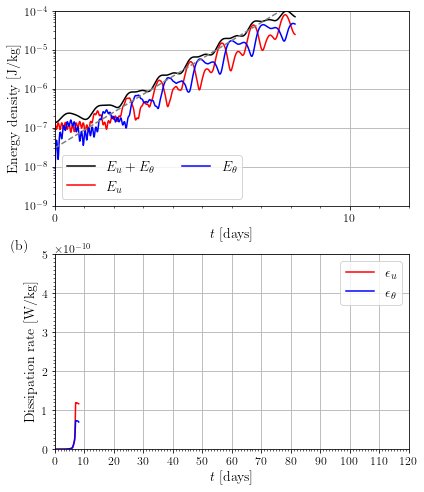

In [17]:
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.ticker as ptick

growth_rate = 0.0613 * 1.e-4
theoretical_series = np.exp(growth_rate * reader.time * 2) * 3.e-8

rc('text', usetex=True)
rc('font', family='serif')
fs = 14
plt.rcParams["font.size"] = 12

fig = plt.figure(figsize=(6, 7))
fig.subplots_adjust(left=0.15, bottom=0.08, right=0.97,
                    top=0.95, wspace=0.2, hspace=0.25)

ax1 = fig.add_subplot(211)
ax1.plot(time_days, total_energy, 'k', label=r'$E_u + E_\theta$')
ax1.plot(time_days, reader.KE, 'r', label=r'$E_u$')
ax1.plot(time_days, reader.PE, 'b', label=r'$E_\theta$')
ax1.plot(time_days, theoretical_series, 'gray', linestyle='--')

grid_x_ticks_minor = np.arange(0, 121, 1)
grid_x_ticks_major = np.arange(0, 130, 10)

ax1.set_xticks(grid_x_ticks_minor, minor=True)
ax1.set_xticks(grid_x_ticks_major, major=True)
ax1.set_xlim(0, 12);
ax1.set_ylim(1.e-9, 1.e-4)

ax1.grid()
ax1.set_yscale('log')
ax1.set_xlabel(r'$t$ [days]', fontsize=fs)
ax1.set_ylabel(r'Energy density [J/kg]', fontsize=fs)
ax1.legend(fontsize=fs, ncol=2)

ax2 = fig.add_subplot(212)
ax2.plot(time_days, DKE_mean, 'r', label=r'$\epsilon_u$')
ax2.plot(time_days, DPE_mean, 'b', label=r'$\epsilon_\theta$')

grid_x_ticks_minor = np.arange(0, 121, 1)
grid_x_ticks_major = np.arange(0, 130, 10)
grid_y_ticks_minor = np.arange(0, 5.1e-10, 0.1e-10)
grid_y_ticks_major = np.arange(0, 6.e-10, 1.e-10)

ax2.set_xticks(grid_x_ticks_minor, minor=True)
ax2.set_xticks(grid_x_ticks_major, major=True)
ax2.set_yticks(grid_y_ticks_minor, minor=True)
ax2.set_yticks(grid_y_ticks_major, major=True)
ax2.set_xlim(0, 120);
ax2.set_ylim(0, 5.e-10)
ax2.grid()
ax2.set_xlabel(r'$t$ [days]', fontsize=fs)
ax2.set_ylabel(r'Dissipation rate [W/kg]', fontsize=fs)
ax2.legend(fontsize=fs)
fig.text(0.05, 0.475, r"(b)", fontsize=fs)

figure_name = "energy_time_series_log" + experiment_name
fig.savefig(figure_directory + "/" + figure_name + '.eps')
fig.savefig(figure_directory + "/" + figure_name + '.png')
time_days[-1]